In [89]:
require(bnlearn)
require(data.table)
require(magrittr)

require(ggplot2)
require(Rgraphviz)

Loading required package: ggplot2


In [131]:
df <- data.table(
    X = rnorm(1000),
    Y = rnorm(1000),
    Z = rnorm(1000)
)[,
    .(
        X, Y, Z,
        U = X * Y + rnorm(1000, 0, 0.5),
        V = Y + Z + rnorm(1000, 0, 0.5)
    )
][,
    .(
        X, Y, Z, U, V,
        W = U + V
    )
]
df %>% head

X,Y,Z,U,V,W
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.24607354,-0.5486252,0.93097369,-0.28453812,0.8411018,0.5565637
-0.06767863,0.1626843,-1.10890506,-0.06115366,-0.4530632,-0.5142169
-0.17870842,-0.3288292,-0.06045212,0.52394934,-0.7187875,-0.1948381
-0.59796400,-1.4668297,0.22759494,1.05915589,-0.8911790,0.1679769
0.72428404,-1.1757176,1.84759411,-0.60410744,0.1364702,-0.4676372
0.64693193,0.2426385,0.59392013,0.55841281,0.6257115,1.1841243


In [103]:
df <- df[, .(
    X = factor(sign(X)),
    Y = factor(sign(Y)),
    Z = factor(sign(Z)),
    U = factor(sign(U)),
    V = factor(sign(V)),
    W = factor(sign(W))
)]
df %>% head

X,Y,Z,U,V,W
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,1,1,1
1,1,1,1,1,1
1,1,-1,1,1,1
1,-1,1,1,-1,-1
-1,1,-1,-1,-1,-1
1,1,1,1,1,1


In [132]:
dag <- tabu(df,
    blacklist = data.table(
        from = c("U", "V", "W", "U", "V", "W", "U", "V", "W"),
        to   = c("X", "X", "X", "Y", "Y", "Y", "Z", "Z", "Z")
    ),
    restart = 10
)
dag

Warning message in check.unused.args(extra, c(method.extra.args[[heuristic]], score.extra.args[[score]])):
"unused argument(s): 'restart'."


  Bayesian network learned via Score-based methods

  model:
   [X][Y][Z][V|Y:Z][W|V][U|Y:Z:W] 
  nodes:                                 6 
  arcs:                                  6 
    undirected arcs:                     0 
    directed arcs:                       6 
  average markov blanket size:           3.00 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  learning algorithm:                    Tabu Search 
  score:                                 BIC (Gauss.) 
  penalization coefficient:              3.453878 
  tests used in the learning procedure:  106 
  optimized:                             TRUE 


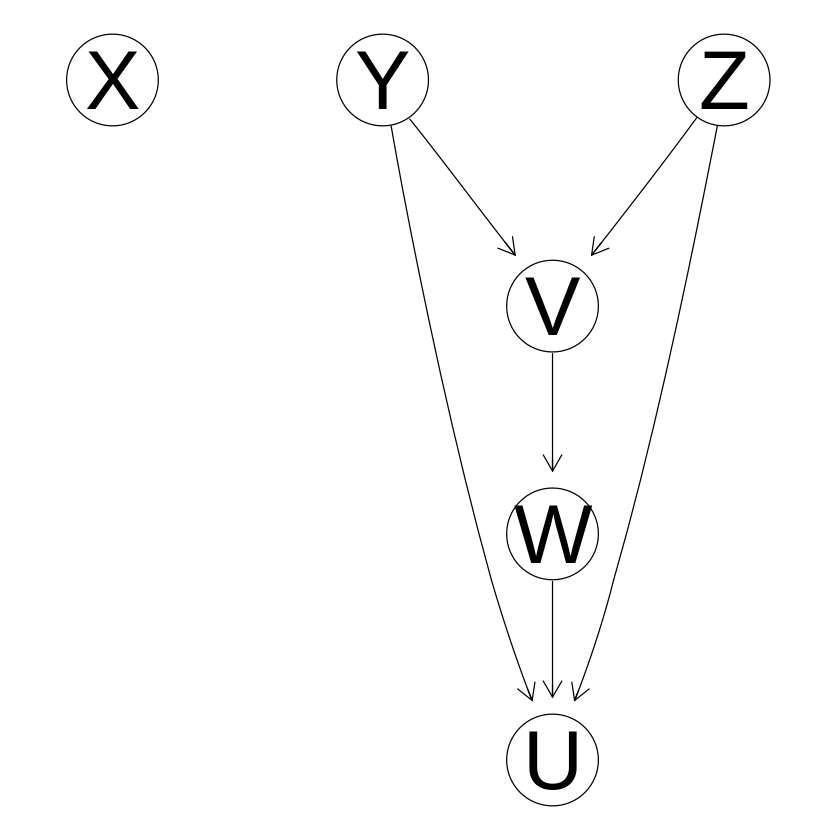

In [133]:
graphviz.plot(dag)

In [134]:
fitted <- bn.fit(dag, df)

In [135]:
pred = predict(fitted, "W", df)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


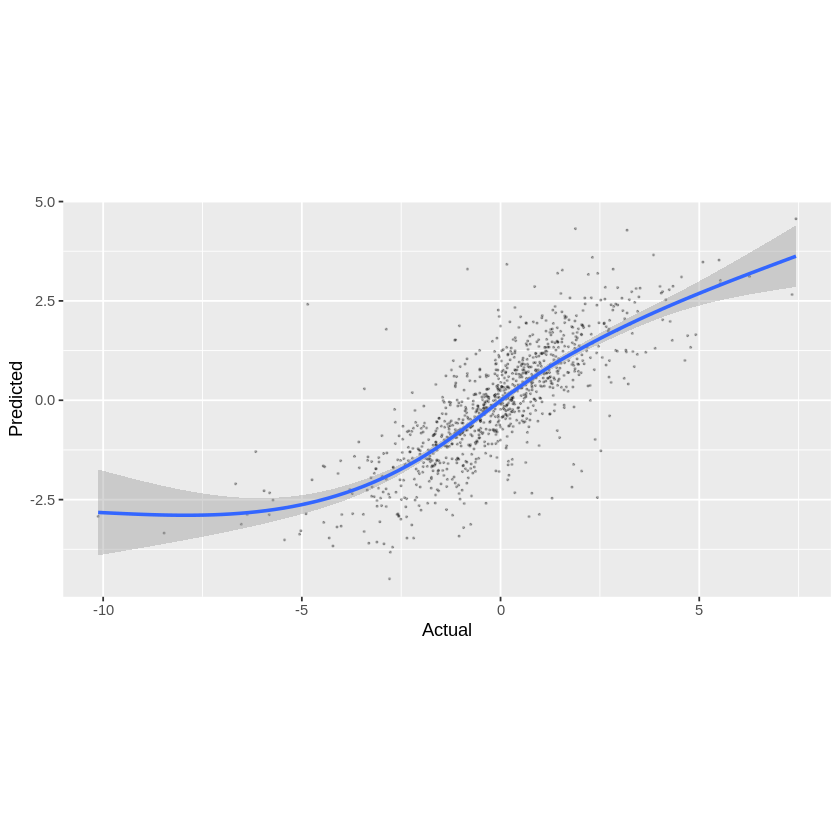

In [143]:
ggplot(data.table(Actual = df$W, Predicted = pred), aes(x = Actual, y = Predicted)) +
    geom_point(alpha = 0.25, size = 0.25) +
    geom_smooth() +
    coord_fixed(ratio = 1)

In [197]:
z.inputs <- fread("inputs-si.tsv")
z.inputs$`random stream` = factor(z.inputs$`random stream`)
z.inputs %>% dim

[1] 85000    33

In [198]:
z.outputs <- fread("outputs-si-wide.tsv")[Replacement == "Advantaged" & Scale == "Niche" & Time == 2050]
z.outputs$Replacement <- NULL
z.outputs$Scale       <- NULL
z.outputs$Time        <- NULL
z.outputs$`prepiloting` = factor(z.outputs$`prepiloting`)
z.outputs$`pilot plant construction` = factor(z.outputs$`pilot plant construction`)
z.outputs$`pilot plant is built` = factor(z.outputs$`pilot plant is built`)
z.outputs$`startup piloting complete` = factor(z.outputs$`startup piloting complete`)
z.outputs$`piloting ongoing` = factor(z.outputs$`piloting ongoing`)
z.outputs$`piloting complete` = factor(z.outputs$`piloting complete`)
z.outputs$`predemoing` = factor(z.outputs$`predemoing`)
z.outputs$`demo plant construction` = factor(z.outputs$`demo plant construction`)
z.outputs$`demo plant is built` = factor(z.outputs$`demo plant is built`)
z.outputs$`regulatory process ongoing` = factor(z.outputs$`regulatory process ongoing`)
z.outputs$`startup demoing completed` = factor(z.outputs$`startup demoing completed`)
z.outputs$`demoing ongoing` = factor(z.outputs$`demoing ongoing`)
z.outputs$`demoing complete` = factor(z.outputs$`demoing complete`)
z.outputs$`regulatory delay` = factor(z.outputs$`regulatory delay`)
z.outputs$`precommercial` = factor(z.outputs$`precommercial`)
z.outputs$`commercial plant construction` = factor(z.outputs$`commercial plant construction`)
z.outputs$`commercial plant is built` = factor(z.outputs$`commercial plant is built`)
z.outputs$`commercial plant operation` = factor(z.outputs$`commercial plant operation`)
z.outputs$`stage in progress` = factor(z.outputs$`stage in progress`)
z.outputs$`profitability indicator` = factor(z.outputs$`profitability indicator`)
z.outputs$`bioproduct favorability indicator` = factor(z.outputs$`bioproduct favorability indicator`)
z.outputs$`total approval cost` = factor(z.outputs$`total approval cost`)
z.outputs$`in business indicator` = factor(z.outputs$`in business indicator`)
z.outputs$`internal project cancelled indicator` = factor(z.outputs$`internal project cancelled indicator`)
z.outputs %>% dim

[1] 85000    50

In [244]:
#z <- merge(z.inputs, z.outputs[, .(`Run`, `Cumulative Production`)], by = "Run")
z <- z.outputs[, .(
    `Run`,
`prepiloting`,
`pilot plant construction`,
`pilot plant is built`,
`startup piloting complete`,
`piloting ongoing`,
`piloting complete`,
`predemoing`,
`demo plant construction`,
`demo plant is built`,
`regulatory process ongoing`,
`startup demoing completed`,
`demoing ongoing`,
`demoing complete`,
`regulatory delay`,
`precommercial`,
`commercial plant construction`,
`commercial plant is built`,
`commercial plant operation`,
`stage in progress`,
`profitability indicator`,
`bioproduct favorability indicator`,
`in business indicator`
)]
z$Run <- NULL
z %>% dim

[1] 85000    22

In [245]:
z.dag <- hc(z)
z.dag


  Bayesian network learned via Score-based methods

  model:
   [pilot plant construction][piloting complete]
   [piloting ongoing|pilot plant construction:piloting complete]
   [predemoing|piloting complete]
   [prepiloting|pilot plant construction:piloting ongoing:piloting complete]
   [demo plant construction|piloting complete:predemoing]
   [pilot plant is built|prepiloting:pilot plant construction]
   [demo plant is built|piloting complete:predemoing:demo plant construction]
   [startup piloting complete|pilot plant is built]
   [startup demoing completed|demo plant is built]
   [stage in progress|piloting ongoing:startup demoing completed]
   [demoing complete|startup demoing completed:stage in progress]
   [demoing ongoing|demo plant is built:demoing complete]
   [profitability indicator|startup piloting complete:demoing ongoing:stage in progress]
   [bioproduct favorability indicator|startup demoing completed:stage in progress:profitability indicator]
   [in business indicator

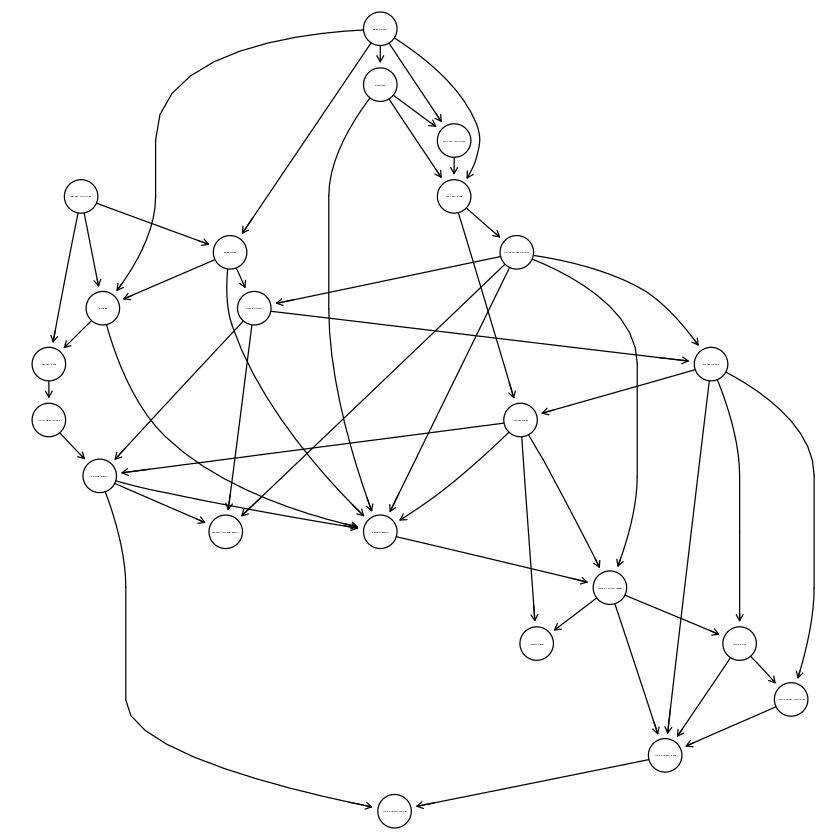

In [246]:
graphviz.plot(z.dag)